In [2]:
from epynet import Network
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src/')
from network_grouping import *

In [3]:
inp = "../input/santaizabel0118.inp"

n_groups = 20

In [4]:
# Get y from csv

df = pd.read_csv('st_izabel-0118_20groups.csv')
nodes_groups = np.asarray(df)

nodes = [str(nodes_groups[i,0]) for i in range(nodes_groups.shape[0])]
groups = nodes_groups[:,1]
y = zip(nodes, nodes_groups[:,1])
y = dict(y)

In [5]:
#graph_groups(inp, y, n_groups)

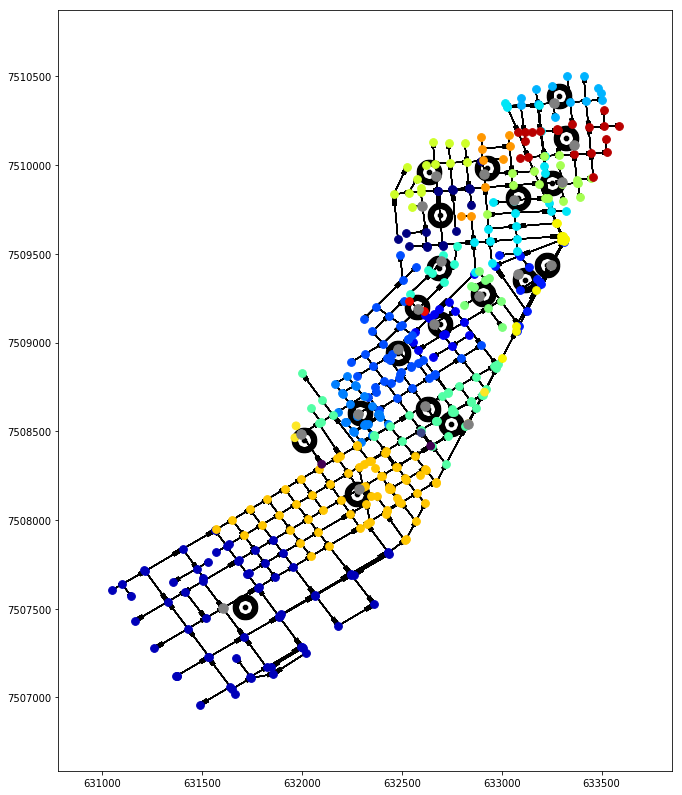

In [7]:

net = inp_to_graph(inp)
        
cmap = plt.cm.get_cmap('', n_groups + 1)
   
for i_groups in range(n_groups):
        
        node_list = [key for key in y.keys() if y[key] == i_groups] # List of all nodes in i_groups
        
        nodes = nodes_next_center(inp, y, i_groups)
        
        # Visualize the network:
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list,
                      node_color = cmap(i_groups))
        
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, nodelist = nodes,
                      node_color = 'gray')
        
        center = center_group(inp, y, i_groups)
         
        plt.scatter(center[:,0], center[:,1], marker="8", linewidths = 20, color= 'black')
        #plt.annotate('Centroid', (center[:,0], center[:,1]))
            
fig_size = [0,0]
fig_size[0] = 11
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size
#plt.legend( loc='lower left', fontsize=8)
fig_size
plt.savefig(str(inp)+ str(n_groups) + 'groups.png')

plt.show()